# Mock traces example

In [1]:
import os
import sys
from radiocalibrationtoolkit import *

[INFO] LFmap: Import successful.


In [2]:
piko = 1e-12

In [3]:
# some global plot settings
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.size"] = 16
plt.rcParams["legend.fontsize"] = 12

plt.rcParams["xtick.major.width"] = 2
plt.rcParams["ytick.major.width"] = 2

plt.rcParams["xtick.major.size"] = 5
plt.rcParams["ytick.major.size"] = 5

plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14

In [4]:
# read HW response
hw_file_path = "./antenna_setup_files/HardwareProfileList_realistic.xml"
hw_dict = read_hw_file(hw_file_path, interp_args={"fill_value": "extrapolate"})

hw_reponse_1 = hw_dict["RResponse"]["LNA"]
hw_reponse_2 = hw_dict["RResponse"]["digitizer"]
hw_reponse_3 = hw_dict["RResponse"]["cable_fromLNA2digitizer"]
hw_reponse_4 = hw_dict["RResponse"]["impedance_matching_EW"]


# merge all hw responses to one function
def hw_response_func(x):
    return dB2PowerAmp(
        hw_reponse_1(x) + hw_reponse_2(x) + hw_reponse_3(x) + hw_reponse_4(x)
    )


# impedance function
impedance_func = hw_dict["IImpedance"][
    "antenna_EW"
]

# read sidereal voltage square spectral density
sidereal_voltage2_density_DF = pd.read_csv(
    "./voltage2_density/voltage2_density_Salla_EW_GSM16.csv",
    index_col=0,
)
sidereal_voltage2_density_DF.columns = sidereal_voltage2_density_DF.columns.astype(
    float
)

<?xml version="1.0" encoding="iso-8859-1"?>
<Element HardwareProfileList at 0x7f76190f3300>


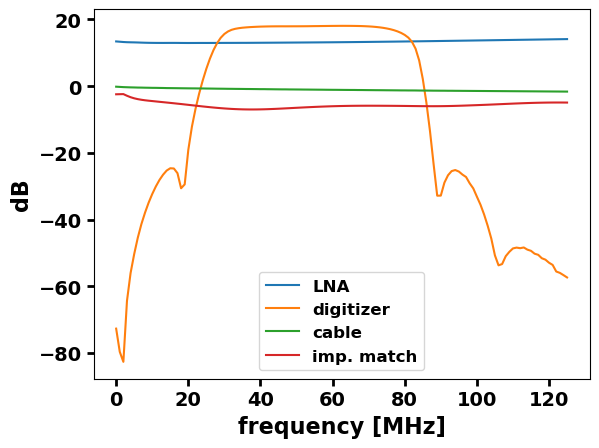

In [5]:
fig, ax = plt.subplots()
frequencies = np.linspace(0,125,126)
ax.plot(frequencies, hw_reponse_1(frequencies), label='LNA')
ax.plot(frequencies, hw_reponse_2(frequencies), label='digitizer')
ax.plot(frequencies, hw_reponse_3(frequencies), label='cable')
ax.plot(frequencies, hw_reponse_4(frequencies), label='imp. match')
ax.set_xlabel('frequency [MHz]')
ax.set_ylabel('dB')
ax.legend()

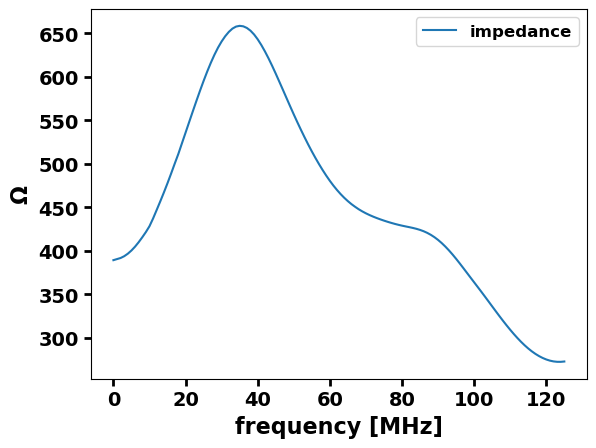

In [6]:
fig, ax = plt.subplots()
frequencies = np.linspace(0,125,126)
ax.plot(frequencies, impedance_func(frequencies), label='impedance')
ax.set_xlabel('frequency [MHz]')
ax.set_ylabel('$\Omega$')
ax.legend()

The power obtained from the spectra calculated by applying the Discrete Fourier Transform (DFT) to time traces is calculated as follows:

 \begin{equation}
P_s = 2\frac{1}{T} \sum_{k=f}^{f+\delta f} \frac{|X(k)|^2}{R(f)} \Delta f
\end{equation}

where $\Delta t$ is the sampling time, $T$ the time trace length, $N$ the number of samples, $f_s$ sampling frequency and $R$ the impedance,

where

 \begin{equation}
X(k) = X(k)_{DFT} \Delta t = \frac{X(k)_{DFT}}{fs}
\end{equation}

where $X(k)_{DFT}$ is "one-sided" absolute spectrum obtained by applying discrete Fourier transform to the time trace. 

On the other hand, the power deposited to antenna by the galactic radio emission is calculated as:

 \begin{equation}
P_{sky}(t,f) = \frac{k_{b}}{c^{2}} \sum_{f} f^{2} \int_{\Omega} T_{sky}(t,f,\theta,\phi) \frac{|H(f,\theta,\phi)|^{2}Z_{0}}{R(f)} \Delta f d\Omega  
\end{equation} 

where $Z_0$ is the vacuum impedance, $R_r$ is the antenna impedance, $k_b$ the Boltzmann constant and $c$ is the speed of light.

Denoting power spectral density as 

 \begin{equation}
S_{P}(t,f) = \frac{k_{b}}{c^{2}} f^{2} \int_{\Omega} T_{sky}(t,f,\theta,\phi) \frac{|H(f,\theta,\phi)|^{2}Z_{0}}{R(f)} d\Omega  
\end{equation} 

we can rewrite the equation as

 \begin{equation}
P_{sky}(t,f) = \sum_{f} S_{P}(t,f)  \Delta f
\end{equation} 

Further, the voltage square density  $S_{\nu}(t,f)$ we defined as  

 \begin{equation}
S_{\nu}(t,f) = \frac{S_{P}(t,f)}{R(f)}
\end{equation} 

or as:

 \begin{equation}
S_{\nu}(t,f) = U_{\nu}^2 
\end{equation} 

Equating the two definitions of power yields:

 \begin{equation}
2\frac{1}{T} \sum_{k=f}^{f+\delta f} \frac{|X(k)|^2}{R(f)} \Delta f = 
\frac{k_{b}}{c^{2}} \sum_{f} f^{2} \int_{\Omega} T_{sky}(t,f,\theta,\phi) \frac{|H(f,\theta,\phi)|^{2}Z_{0}}{R_{r}} \Delta f d\Omega  
\end{equation}
 

 \begin{equation}
2\frac{1}{T} \frac{|X(k)|^2}{R(f)}  = 
\frac{k_{b}}{c^{2}} f^{2} \int_{\Omega} T_{sky}(t,f,\theta,\phi) \frac{|H(f,\theta,\phi)|^{2}Z_{0}}{R(f)}  d\Omega  
\end{equation}

 \begin{equation}
2\frac{1}{T} |X(k)|^2 = 
\frac{k_{b}}{c^{2}} f^{2} Z_{0}  \int_{\Omega} T_{sky}(t,f,\theta,\phi) |H(f,\theta,\phi)|^{2} d\Omega  
\end{equation}

 \begin{equation}
2\frac{1}{T} |X(k)|^2 = S_{\nu}(t,f)  
\end{equation}

 \begin{equation}
|X(k)|^2 = \frac{1}{2} T  S_{\nu}(t,f)
\end{equation}

 \begin{equation}
|X(k)_{DFT}|^2 \Delta t^2 = 
\frac{1}{2} T  S_{\nu}(t,f)
\end{equation}

 \begin{equation}
|X(k)_{DFT}|^2  = 
\frac{T}{\Delta t^2} \frac{1}{2}  S_{\nu}(t,f)  
\end{equation}

 \begin{equation}
|X(k)_{DFT}|^2  = 
\frac{N f_{s}^2}{ f_s} \frac{1}{2}   S_{\nu}(t,f) 
\end{equation}

 \begin{equation}
|X(k)_{DFT}|^2  =  \frac{N f_{s}}{2}   S_{\nu}(t,f)  
\end{equation}

 \begin{equation}
|X(k)_{DFT}|  = \sqrt{\frac{N f_{s} }{2}}   \sqrt{S_{\nu}(t,f)}  
\end{equation}

A small reminder of the system parameter relations:
 
 \begin{equation}
\Delta f = \frac{fs}{N} = \frac{1}{N\Delta t} = \frac{1}{T} 
\end{equation}

 \begin{equation}
fs = \frac{1}{\Delta t}
\end{equation}


Thermal noise:

 \begin{equation}
v^2 = 4 k_B T R
\end{equation}

where $k_B$ is the Boltzmann constant, $T$ is the temperature and $R$ is the impedance.

source: https://en.wikipedia.org/wiki/Johnson%E2%80%93Nyquist_noise

In [7]:
mock_trace_generator = Mock_trace_generator(
    sidereal_voltage2_density_DF=sidereal_voltage2_density_DF,
    hw_response_func=hw_response_func,
    impedance_func=impedance_func,
    voltage2ADC=2048,
    time_trace_size=2048,
    sampling_frequency_MHz=250,
)
freq_MHz_bins = mock_trace_generator.get_frequency_bins()

In [8]:
mock_traces_DF = mock_trace_generator.generate_mock_trace(5, nbi = {"67": 1}, nbi_err=0.3)

  0%|                                                     | 0/5 [00:00<?, ?it/s]

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 34.24it/s]

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 34.00it/s]

Text(0, 0.5, 'amplitude [ADC]')

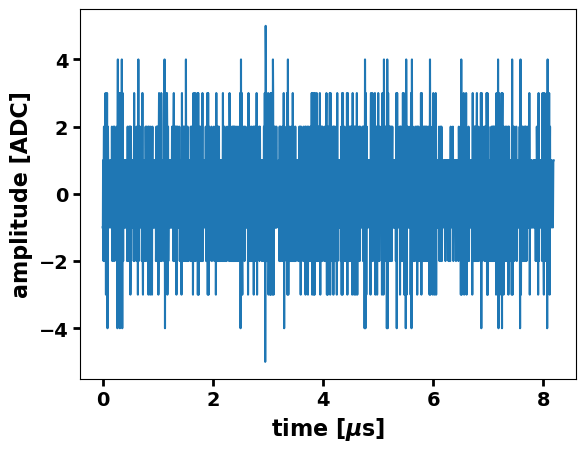

In [9]:
fig, ax = plt.subplots()
ax.plot(mock_traces_DF.columns.values[2:], mock_traces_DF.iloc[1,2:])
ax.set_xlabel('time [$\mu$s]')
ax.set_ylabel('amplitude [ADC]')


In [10]:
additional_noise = 5e-4*piko

debug_spectra_dict = mock_trace_generator.generate_mock_trace(
    1, lst=15, temp_celsius=4, nbi={"67": 1}, nbi_err=0.3, return_debug_dict=True, additional_noise=additional_noise
)[0]

  0%|                                                     | 0/1 [00:00<?, ?it/s]

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 233.84it/s]

In [11]:
debug_spectra_dict

{'freq_MHz_bins': array([0.00000000e+00, 1.22070312e-01, 2.44140625e-01, ...,
        1.24755859e+02, 1.24877930e+02, 1.25000000e+02]),
 'sidereal_voltage2_density': array([-1.31014973e-18, -1.27563936e-18, -1.24112898e-18, ...,
         2.73509301e-18,  2.72614943e-18,  2.71720585e-18]),
 'thermal_noise_voltage2_density': array([5.95840564e-18, 5.96073384e-18, 5.96306205e-18, ...,
        4.17421282e-18, 4.17493029e-18, 4.17564775e-18]),
 'total_voltage2_density_scattered': array([1.33143804e-18, 6.93411170e-18, 1.37020832e-17, ...,
        5.59640625e-19, 1.66845620e-18, 2.37129691e-18]),
 'total_voltage2_density_scattered_in_HW': array([8.55754489e-25, 3.65328376e-24, 5.91757159e-24, ...,
        5.91856194e-24, 1.74881487e-23, 2.46341185e-23]),
 'total_voltage2_density_scattered_in_HW_with_additional_noise': array([1.80561060e-16, 2.24800607e-17, 4.42083367e-16, ...,
        2.00469894e-16, 1.71757734e-16, 6.75060299e-16]),
 'spectrum_voltage_density_in_HW': array([4.68052507e-07, 

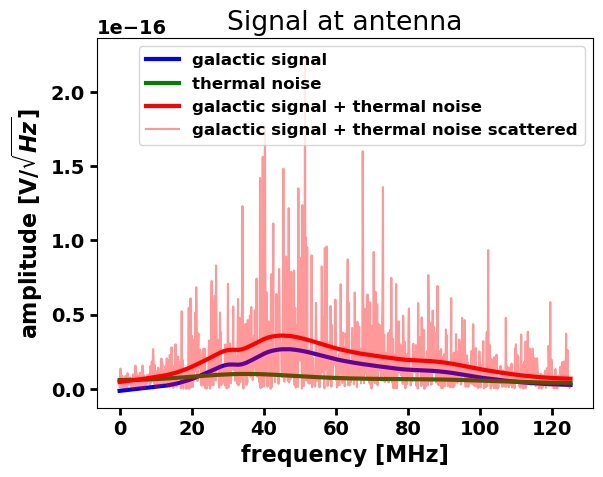

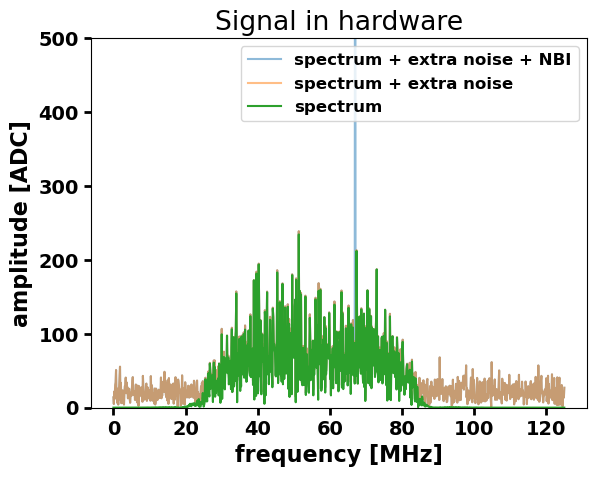

In [12]:
x = debug_spectra_dict["freq_MHz_bins"]
fig, ax = plt.subplots()
ax.set_title("Signal at antenna")

ax.plot(
    x,
    debug_spectra_dict["sidereal_voltage2_density"],
    lw=3,
    label="galactic signal",
    color="b",
)
ax.plot(
    x,
    debug_spectra_dict["thermal_noise_voltage2_density"],
    lw=3,
    label="thermal noise",
    color="green",
)

ax.plot(
    x,
    debug_spectra_dict["sidereal_voltage2_density"]
    + debug_spectra_dict["thermal_noise_voltage2_density"],
    label="galactic signal + thermal noise",
    lw=3,
    color="r",
)

ax.plot(
    x,
    debug_spectra_dict["total_voltage2_density_scattered"],
    alpha=0.4,
    label="galactic signal + thermal noise scattered",
    color="r",
)

ax.set_xlabel("frequency [MHz]")
ax.set_ylabel("amplitude [V/$\sqrt{Hz}]$")
ax.legend()


fig, ax = plt.subplots()
ax.set_title("Signal in hardware")

volts2adc = 2048
ax.plot(
    x,
    debug_spectra_dict["spectrum_voltage_density_in_HW_with_additional_noise_with_NBI"] * volts2adc,
    alpha=0.5,
    label="spectrum + extra noise + NBI",
)
ax.plot(
    x,
    debug_spectra_dict["spectrum_voltage_density_in_HW_with_additional_noise"] * volts2adc,
    alpha=0.5,
    label="spectrum + extra noise",
)
ax.plot(
    x,
    debug_spectra_dict["spectrum_voltage_density_in_HW"] * volts2adc,
    alpha=1,
    label="spectrum",
)

ax.set_xlabel("frequency [MHz]")
ax.set_ylabel("amplitude [ADC]")
ax.set_ylim(0, 500)
ax.legend()